# DNA methylation in Mytilus chileanis

Epigenetic mechanisms of local adaptation

Cristian Gallardo [](https://orcid.org/0000-0000-0000-0000) (University of Concepcion)  
Valentina Venezuala [](https://orcid.org/0000-0000-0000-0001) (University of Concepcion)  
Steven Roberts [](https://orcid.org/0000-0000-0000-0002) (University of Washington)  
August 12, 2025

We investigate genome-wide DNA methylation patterns in Mytilus chilensis from two contrasting seedbeds—Cochamó and Yaldad—with the aim of identifying differentially methylated regions (DMRs) that may underlie local adaptation. By integrating this epigenetic information with known patterns of gene expression and environmental context, we seek to illuminate the molecular basis of ecological divergence and contribute new insights into how environmental and anthropogenic forces shape genomic and epigenomic variation in a key aquaculture species.

# Introduction

Understanding how marine species respond to environmental heterogeneity is critical for conserving locally adapted populations and sustaining aquaculture practices in the face of global change. The Chilean blue mussel, Mytilus chilensis, a key endemic species in southern Chile, supports one of the world’s largest mussel aquaculture industries. However, the biological foundation of population-level adaptation in this species remains underexplored. Emerging evidence suggests that both genetic and epigenetic mechanisms—particularly DNA methylation—may contribute to phenotypic plasticity and local adaptation in marine invertebrates.

Previous studies have revealed extensive transcriptomic and mitochondrial differences between M. chilensis populations from ecologically distinct seedbeds, such as Cochamó (41°S) and Yaldad (43°S), in the inner sea of Chiloé Island. These differences include differential expression of genes involved in immunity, metabolism, and cellular stress responses, as well as tissue-specific shifts in mitochondrial gene expression linked to local environmental pressures, including aquaculture practices and variable oxygenation levels \[@yevenes2021adaptive; @yevenes2022adaptive\]. Experimental evidence from reciprocal transplants shows population-specific transcriptional responses and reduced growth performance upon translocation, highlighting functional divergence between seedbeds despite high larval connectivity \[@yevenes2025decoding\].

In addition to gene expression differences, recent work has uncovered epigenetic signatures that may contribute to adaptive divergence. Long non-coding RNAs (lncRNAs) were found to be differentially expressed between Cochamó and Yaldad populations, with associated changes in immune and metabolic gene networks \[@yevenes2023epigenetic\]. These findings underscore the potential for environmentally responsive regulatory elements—including DNA methylation—to mediate local adaptation.

Yet, the role of DNA methylation in shaping population-specific responses in M. chilensis remains unexplored. DNA methylation, a heritable and reversible epigenetic modification, can influence gene expression and phenotypic traits without altering the underlying DNA sequence. In bivalves, DNA methylation is known to affect developmental and immune processes and may be responsive to environmental stressors such as hypoxia, toxins, and acidification—conditions that vary across the Chilean inner sea and have been shown to modulate gene expression and microbiota composition in M. chilensis \[@montufar2024hypoxia; @castillo2017ocean; @montufar2025microbiota\].

In this study, we investigate genome-wide DNA methylation patterns in Mytilus chilensis from two contrasting seedbeds—Cochamó and Yaldad—with the aim of identifying differentially methylated regions (DMRs) that may underlie local adaptation. By integrating this epigenetic information with known patterns of gene expression and environmental context, we seek to illuminate the molecular basis of ecological divergence and contribute new insights into how environmental and anthropogenic forces shape genomic and epigenomic variation in a key aquaculture species.

## Methods

To investigate DNA methylation differences between populations of Mytilus chilensis from Cochamó and Yaldad, whole-genome bisulfite sequencing (WGBS) was performed and analyzed using a reproducible, high-throughput bioinformatics workflow. DNA was extracted from gill tissue of adult individuals and subjected to bisulfite treatment and library preparation. Libraries were sequenced on an Illumina NovaSeq 6000 platform, generating 150 bp paired-end reads, with each sample yielding approximately 120–160 million read pairs, providing \>30× average coverage across the 1.93 Gb M. chilensis genome.

### Read Processing and Alignment

Raw sequencing reads were processed using the nf-core/methylseq pipeline (version 2.5), implemented through Nextflow (version 23.04.1). Reads were aligned to the M. chilensis reference genome (MchilensisGenomeV1.fa), a chromosome-level assembly comprising 14 scaffolds (Gallardo-Escárate et al. 2023), using Bismark (version 0.24.1) with the Bowtie2 aligner (version 2.5.1). Quality trimming was applied to reverse reads by hard-clipping the final 10 bases (–clip_r2 10) to mitigate low-quality base calls at the 3′ end. Methylation calls were extracted using the Bismark methylation extractor and aggregated by cytosine context. Pipeline execution was configured via a custom .config file to specify HPC resources and run with –resume, –with-trace, –with-report, and –with-timeline flags for reproducibility and tracking. Output files were stored in a structured directory and included per-base CpG methylation calls, quality control metrics, and coverage files.

### Methylation Data Processing and Filtering

Downstream analysis was performed in R (version 4.3.1) using the methylKit package (version 1.10.0). Due to compatibility issues with newer versions of supporting libraries, data.table was pinned to version 1.14.10. Methylation coverage files were imported using methRead() with the pipeline = “bismarkCoverage” parameter and CpG context specified. Six samples—three each from Cochamó (LCo_BSr1–3) and Yaldad (LYa_BSr1–3)—were analyzed. Samples were assigned to treatment groups with Cochamó designated as the control (treatment = 0) and Yaldad as the treatment group (treatment = 1).

To ensure data quality, CpG sites were filtered to retain only those with a minimum read coverage of 10 in all samples, excluding those in the top 2% of coverage values to reduce PCR bias. Sites were then unified across samples using unite() with min.per.group = 3 and destrand = FALSE to retain strand-specific methylation information.

### Exploratory and Differential Methylation Analyses

Global methylation patterns were assessed using hierarchical clustering (Ward’s method on correlation distance) and principal component analysis (PCA) to evaluate sample similarity. Population-level differences in DNA methylation were then tested using methylKit’s logistic regression model, incorporating a multinomial overdispersion correction (overdispersion = “MN”) to account for biological variability. Statistical testing was performed using the Chi-squared test (test = “Chisq”), and q-values were adjusted for multiple testing using the SLIM method (adjust = “SLIM”).

Differentially methylated loci (DMLs) were defined as CpG sites with an absolute methylation difference ≥25% and FDR-adjusted q-value ≤ 0.05. Separate sets of DMLs were extracted to identify hypomethylated (lower in Yaldad) and hypermethylated (higher in Yaldad) loci. Results were saved as tab-delimited text files for downstream annotation and visualization.

## Results

Bisulfite sequencing across six libraries yielded approximately 99.8 million reads per sample. Alignment to the reference genome was successful for 60.5–61.4% of reads, with 22–24% unaligned and 15–16% aligning ambiguously. After removal of duplicate reads (2.2–3.5 million per sample), 57.0–58.8 million uniquely aligned reads remained for methylation analysis.

Genome-wide cytosine methylation was assessed in CpG, CHG, and CHH contexts. Across samples, ~2.1–2.2 billion cytosines were examined. CpG methylation was the most prominent, with an average of ~36 million methylated CpGs and ~205 million unmethylated CpGs per sample, corresponding to a methylation rate of approximately 15%. In contrast, CHG and CHH methylation was much lower, with methylation levels below 1% in both contexts. These patterns are consistent with expectations for invertebrate methylomes, where methylation is primarily restricted to CpG sites.

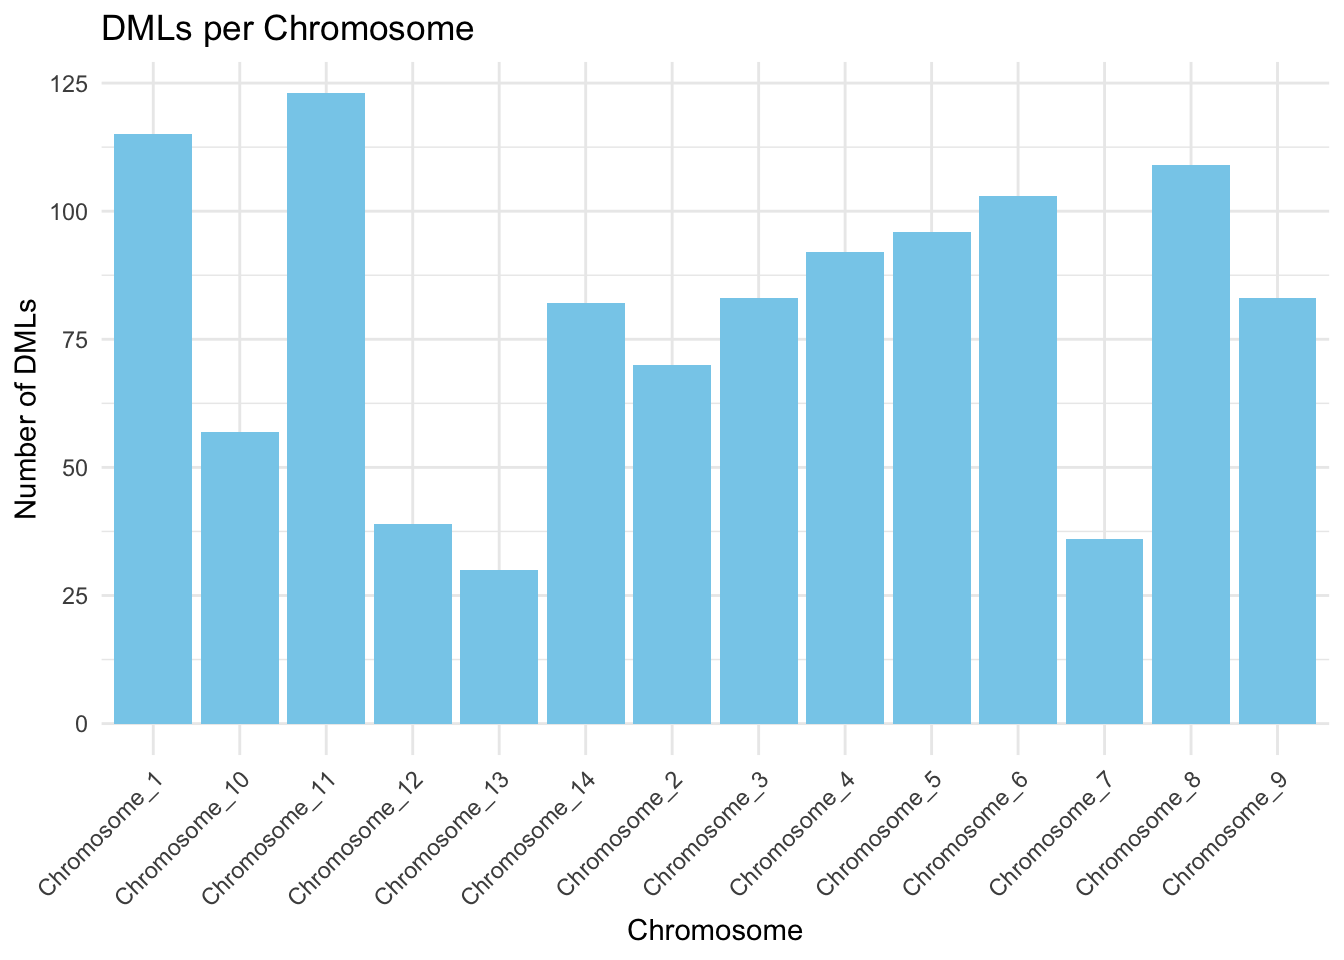

In [ ]:
library(ggplot2)

chromosomes <- c("Chromosome_1", "Chromosome_2", "Chromosome_3", "Chromosome_4", "Chromosome_5",
                 "Chromosome_6", "Chromosome_7", "Chromosome_8", "Chromosome_9", "Chromosome_10",
                 "Chromosome_11", "Chromosome_12", "Chromosome_13", "Chromosome_14")
counts <- c(115, 70, 83, 92, 96, 103, 36, 109, 83, 57, 123, 39, 30, 82)

df <- data.frame(Chromosome = chromosomes, DMLs = counts)

ggplot(df, aes(x = Chromosome, y = DMLs)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "DMLs per Chromosome", y = "Number of DMLs", x = "Chromosome")